In [1]:
from library import sateval

In [2]:

# current path

se = sateval.SatEval("dataset")

In [6]:
se.evaluator.evaluate("test_1","input_decompressed","input_image_path","decompressed_image_path")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/.venv/lib/python3.10/site-packages/lpips/lpips.py:107: FutureWarning: You are using `torc

Loading model from: /Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/.venv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 40/40 [00:29<00:00,  1.34it/s]


In [ ]:
se.configurables.get_modules(se)

In [ ]:
se.configurables.get_methods(se,"compressor")

In [ ]:
se.configurables.get_methods(se,"decompressor")

In [10]:
# Sample dataset for eurosat https://madm.dfki.de/files/sentinel/EuroSAT.zip

# se.dataset_loader.load_by_url("https://madm.dfki.de/files/sentinel/EuroSAT.zip", "eurosat.zip")
# se.dataset_loader.load_by_url("https://jupyterhub.rc.nectar.org.au/user/104353261@student.swin.edu.au/files/EuroSATallBands.zip?_xsrf=2%7Cb6d624f5%7C464b60a8fff006036d67ecded2e8d232%7C1728203351", "eurosatms.zip")

In [ ]:
se.configurables.get_config_template()

In [ ]:
se.configurables.get_pipeline_config_template()

In [3]:
# sample path to download dataset based on pipeline configuration
# config = [
#     {
#         "execution_path":"dataset_loader:load_by_url",
#         "params":{
#             "url":"http://127.0.0.1:5500/TESTDATA/EuroSATallBands.zip",
#             "file_name":"EuroSATallBands.zip"
#         },
#     },
#     {
#         "execution_path":"dataset_loader:unzip_file",
#         "params":{
#             "zip_file_path_or_name":"EuroSATallBands.zip",
#             "destination_folder":"EuroSATallBands"
#         },
#     }
# ]

# sample path to download dataset based on pipeline configuration
# config = [
#     {
#         "execution_path":"pre_processor:convert_ms_to_rgb",
#         "params":{
#             "input_path":"/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/data/dataset/PocImages",
#             "output_folder":"/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/data/dataset/PocImagesRGB"
#         },
#     }    
# ]

# def compress_to_png(self, __run_id:str,input_path:str, output_folder:str,quality:int):
# def decompress_to_png(self,__run_id:str, input_path:str, output_folder:str):

config = [
    {
        "execution_path":"compressor:compress_jpeg",
        "params":{
            "input_path":"/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/data/dataset/PocImagesRGB",
            "output_folder":"/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/data/dataset/PocImagesCompressed",
            "quality":70
        },
    },
    {
        "execution_path":"decompressor:decompress_jpeg",
        "params":{
            "input_path":"/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/data/dataset/PocImagesCompressed",
            "output_folder":"/Users/yashpulse/Library/CloudStorage/OneDrive-SwinburneUniversity/Semester 4/TAP/CH1/research/yash/data/dataset/PocImagesDeCompressed",
        },
    } 
]

In [ ]:
se.configurables.validate_pipeline_config(config)

In [ ]:
se.configurables.validate_config(config[1])

In [4]:
se.configurables.run("test_1",config=config,clf=se)

100%|██████████| 40/40 [00:00<00:00, 79.43it/s]


In [7]:
import sqlite3


conn = sqlite3.connect('sateval.db')

import pandas as pd

df = pd.read_sql_query(f"""SELECT input_image_path as input_file, decompressed_image_path as output_file, results, id
                FROM image_data
                WHERE run_id = 'test_1'""", conn)

# df = pd.read_sql_query(f"""SELECT *
#                 FROM image_data
#                 WHERE run_id = 'test_1'""", conn)


df


input_file  \
0   /Users/yashpulse/Library/CloudStorage/OneDrive...   
1   /Users/yashpulse/Library/CloudStorage/OneDrive...   
2   /Users/yashpulse/Library/CloudStorage/OneDrive...   
3   /Users/yashpulse/Library/CloudStorage/OneDrive...   
4   /Users/yashpulse/Library/CloudStorage/OneDrive...   
5   /Users/yashpulse/Library/CloudStorage/OneDrive...   
6   /Users/yashpulse/Library/CloudStorage/OneDrive...   
7   /Users/yashpulse/Library/CloudStorage/OneDrive...   
8   /Users/yashpulse/Library/CloudStorage/OneDrive...   
9   /Users/yashpulse/Library/CloudStorage/OneDrive...   
10  /Users/yashpulse/Library/CloudStorage/OneDrive...   
11  /Users/yashpulse/Library/CloudStorage/OneDrive...   
12  /Users/yashpulse/Library/CloudStorage/OneDrive...   
13  /Users/yashpulse/Library/CloudStorage/OneDrive...   
14  /Users/yashpulse/Library/CloudStorage/OneDrive...   
15  /Users/yashpulse/Library/CloudStorage/OneDrive...   
16  /Users/yashpulse/Library/CloudStorage/OneDrive...   
17  /Users/yashpulse/Library/CloudStorage/OneDrive...   
18  /Users/yashpulse/Library/CloudStorage/OneDrive...   
19  /Users/yashpulse/Library/CloudStorage/OneDrive...   
20  /Users/yashpulse/Library/CloudStorage/OneDrive...   
21  /Users/yashpulse/Library/CloudStorage/OneDrive...   
22  /Users/yashpulse/Library/CloudStorage/OneDrive...   
23  /Users/yashpulse/Library/CloudStorage/OneDrive...   
24  /Users/yashpulse/Library/CloudStorage/OneDrive...   
25  /Users/yashpulse/Library/CloudStorage/OneDrive...   
26  /Users/yashpulse/Library/CloudStorage/OneDrive...   
27  /Users/yashpulse/Library/CloudStorage/OneDrive...   
28  /Users/yashpulse/Library/CloudStorage/OneDrive...   
29  /Users/yashpulse/Library/CloudStorage/OneDrive...   
30  /Users/yashpulse/Library/CloudStorage/OneDrive...   
31  /Users/yashpulse/Library/CloudStorage/OneDrive...   
32  /Users/yashpulse/Library/CloudStorage/OneDrive...   
33  /Users/yashpulse/Library/CloudStorage/OneDrive...   
34  /Users/yashpulse/Library/CloudStorage/OneDrive...   
35  /Users/yashpulse/Library/CloudStorage/OneDrive...   
36  /Users/yashpulse/Library/CloudStorage/OneDrive...   
37  /Users/yashpulse/Library/CloudStorage/OneDrive...   
38  /Users/yashpulse/Library/CloudStorage/OneDrive...   
39  /Users/yashpulse/Library/CloudStorage/OneDrive...   

                                          output_file  \
0   /Users/yashpulse/Library/CloudStorage/OneDrive...   
1   /Users/yashpulse/Library/CloudStorage/OneDrive...   
2   /Users/yashpulse/Library/CloudStorage/OneDrive...   
3   /Users/yashpulse/Library/CloudStorage/OneDrive...   
4   /Users/yashpulse/Library/CloudStorage/OneDrive...   
5   /Users/yashpulse/Library/CloudStorage/OneDrive...   
6   /Users/yashpulse/Library/CloudStorage/OneDrive...   
7   /Users/yashpulse/Library/CloudStorage/OneDrive...   
8   /Users/yashpulse/Library/CloudStorage/OneDrive...   
9   /Users/yashpulse/Library/CloudStorage/OneDrive...   
10  /Users/yashpulse/Library/CloudStorage/OneDrive...   
11  /Users/yashpulse/Library/CloudStorage/OneDrive...   
12  /Users/yashpulse/Library/CloudStorage/OneDrive...   
13  /Users/yashpulse/Library/CloudStorage/OneDrive...   
14  /Users/yashpulse/Library/CloudStorage/OneDrive...   
15  /Users/yashpulse/Library/CloudStorage/OneDrive...   
16  /Users/yashpulse/Library/CloudStorage/OneDrive...   
17  /Users/yashpulse/Library/CloudStorage/OneDrive...   
18  /Users/yashpulse/Library/CloudStorage/OneDrive...   
19  /Users/yashpulse/Library/CloudStorage/OneDrive...   
20  /Users/yashpulse/Library/CloudStorage/OneDrive...   
21  /Users/yashpulse/Library/CloudStorage/OneDrive...   
22  /Users/yashpulse/Library/CloudStorage/OneDrive...   
23  /Users/yashpulse/Library/CloudStorage/OneDrive...   
24  /Users/yashpulse/Library/CloudStorage/OneDrive...   
25  /Users/yashpulse/Library/CloudStorage/OneDrive...   
26  /Users/yashpulse/Library/CloudStorage/OneDrive...   
27  /Users/yashpulse/Library/CloudStorage/OneDrive...   
28  /Users/yashpulse/Library/CloudStorage/OneDrive..

In [8]:
# function to view the input image, output image and the results using matplotlib
def view_image(input_file:str,output_file:str,results:str):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    from PIL import Image
    import io
    import json

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(mpimg.imread(input_file))
    # axs[0].set_title('Input Image:',input_file.split("/")[1])
    axs[0].set_title('Input Image:')
    axs[0].axis('off')
    axs[1].imshow(mpimg.imread(output_file))
    # axs[1].set_title('Output Image',output_file.split("/")[1])
    axs[1].set_title('Output Image')
    axs[1].axis('off')
    plt.show()
    if results is not None:
        results = json.loads(results)

        for key in results:
            print("-----",key,"-----")
            for metric in results[key]:
                print(metric,":",results[key][metric])

====================================================== 34 ======================================================


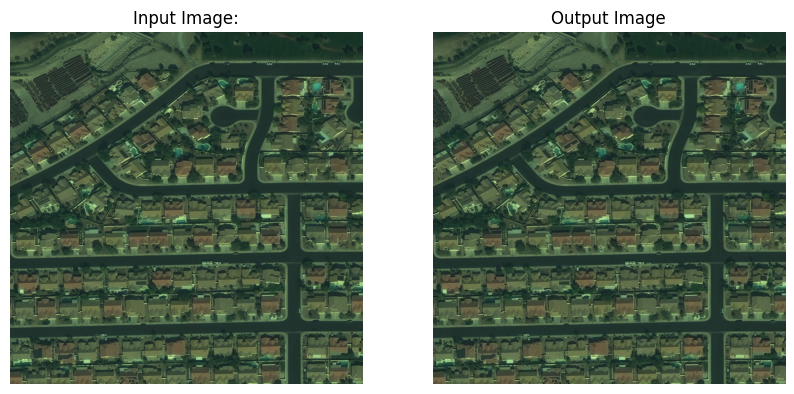

----- input_decompressed -----
PSNR : 34.905076436082204
SSIM : 0.9314412866591052
MSE : 17.724037672583826
LPIPS : 0.02770283818244934
====================================================== 6 ======================================================


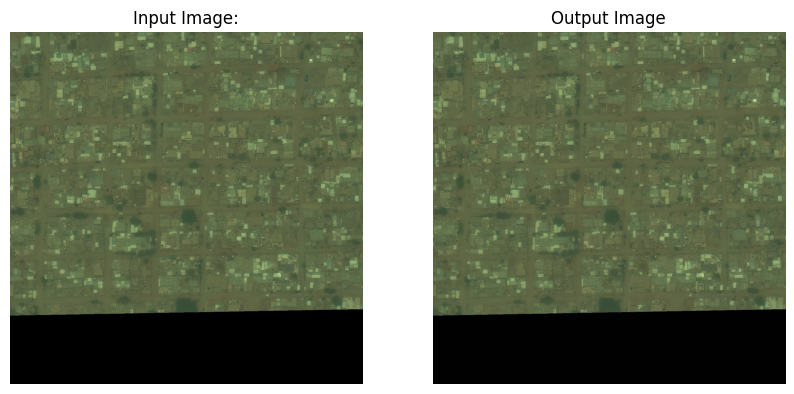

----- input_decompressed -----
PSNR : 39.282409966622964
SSIM : 0.9195936494187733
MSE : 7.451031163708087
LPIPS : 0.05822405219078064
====================================================== 38 ======================================================


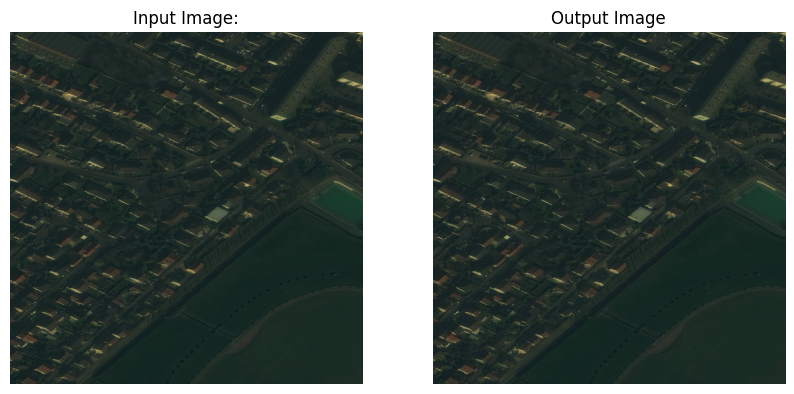

----- input_decompressed -----
PSNR : 37.94914883492631
SSIM : 0.9450537414264512
MSE : 8.559760355029585
LPIPS : 0.04760659113526344
====================================================== 32 ======================================================


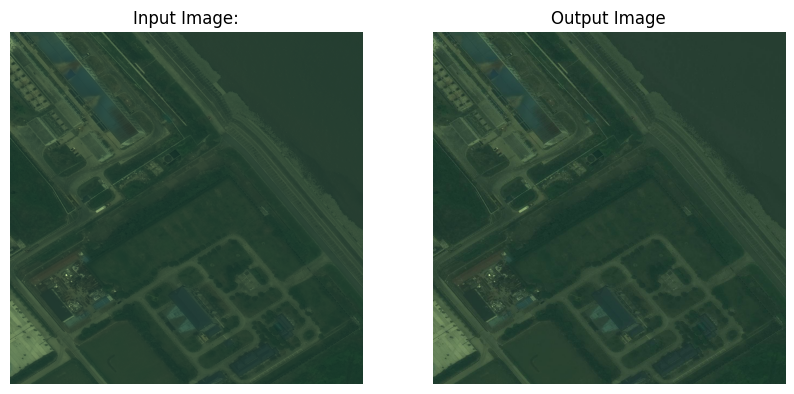

----- input_decompressed -----
PSNR : 40.2505550034327
SSIM : 0.9477739233067689
MSE : 6.030067652859961
LPIPS : 0.040913842618465424
====================================================== 5 ======================================================


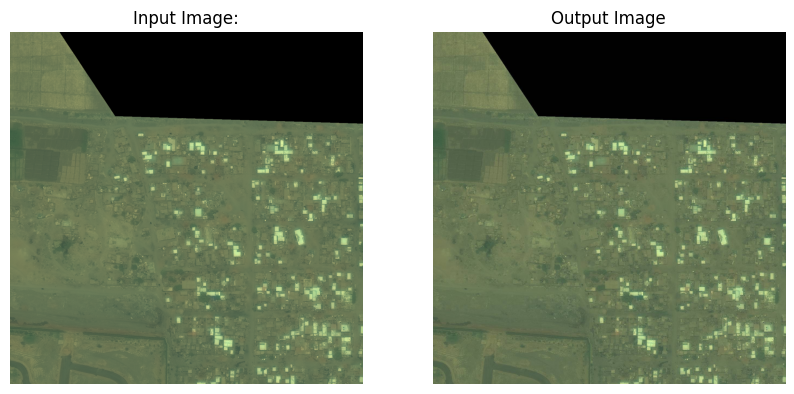

----- input_decompressed -----
PSNR : 38.177727173264195
SSIM : 0.9087732438627719
MSE : 9.321762130177515
LPIPS : 0.05263732746243477
====================================================== 37 ======================================================


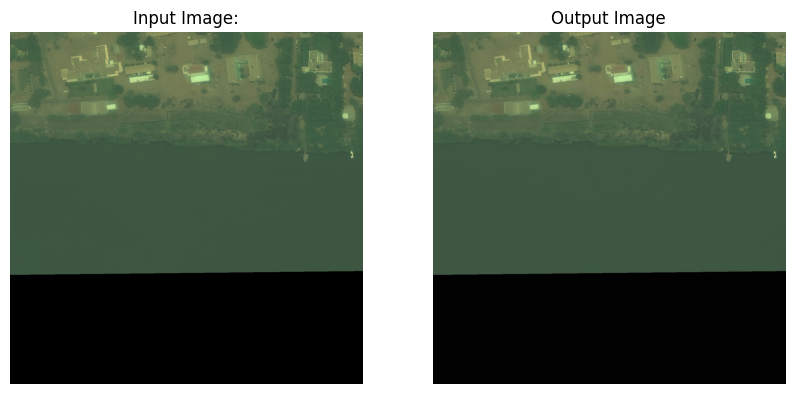

----- input_decompressed -----
PSNR : 42.064502723244956
SSIM : 0.9258602815128331
MSE : 3.9156272189349113
LPIPS : 0.030828850343823433
====================================================== 16 ======================================================


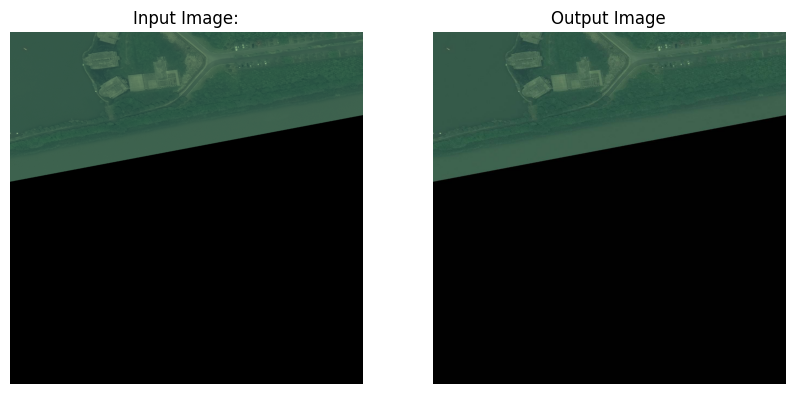

----- input_decompressed -----
PSNR : 43.7868032107169
SSIM : 0.8928176342478472
MSE : 2.5699879684418145
LPIPS : 0.011985797435045242
====================================================== 21 ======================================================


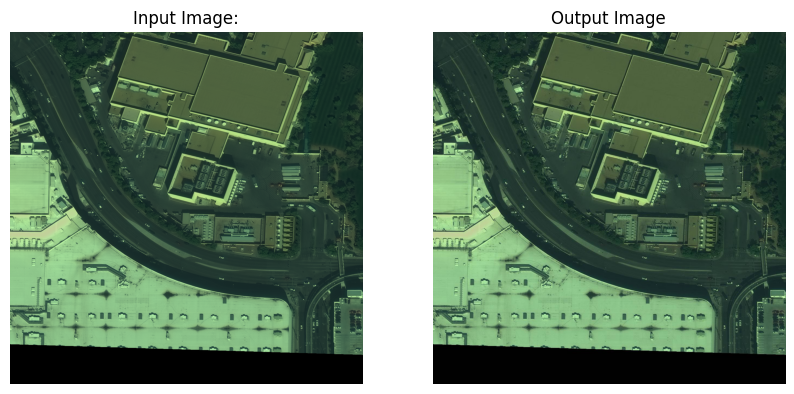

----- input_decompressed -----
PSNR : 36.67024689157593
SSIM : 0.9372916014036932
MSE : 11.48891794871795
LPIPS : 0.01979873888194561
====================================================== 9 ======================================================


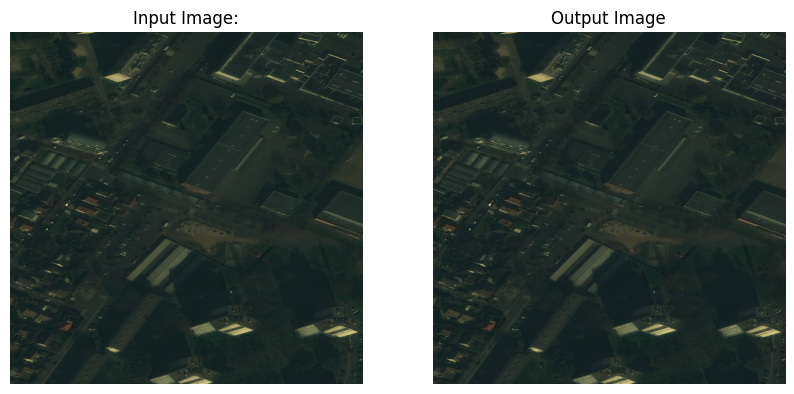

----- input_decompressed -----
PSNR : 39.08463863532421
SSIM : 0.9526484748034005
MSE : 6.798510453648915
LPIPS : 0.04603729397058487
====================================================== 39 ======================================================


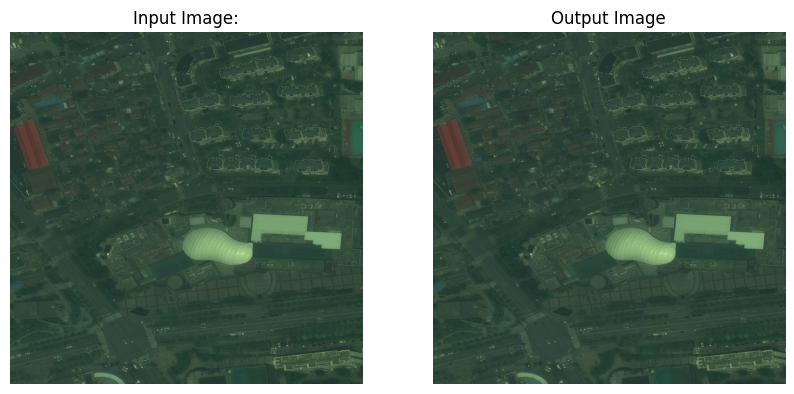

----- input_decompressed -----
PSNR : 38.86444781091064
SSIM : 0.9421174371819844
MSE : 8.081289940828402
LPIPS : 0.03584570810198784


In [12]:
# get random row from df
rows = df.sample(10)

for row in rows.iterrows():
    input_file = row[1].iloc[0]
    output_file = row[1].iloc[1]
    eval_results = row[1].iloc[2]
    id = row[1].iloc[3]
    print("======================================================",id,"======================================================")
    view_image(input_file=input_file,output_file=output_file,results=eval_results)